In [1]:
using FITSIO

In [2]:
using FITSIO

# Define the file path
sample_fits_path = "C:/Users/mjawa/Pictures/git/Stingray.jl/test/data/sample_events.fits"

# Generate sample event data
num_events = 1000
times = sort(rand(100.0:0.1:200.0, num_events))  # Random times between 100s and 200s
energies = rand(100.0:1000.0, num_events)  # Random energy values between 100 keV and 1000 keV

# Create and write the FITS file
FITS(sample_fits_path, "w") do f
    # Step 1: Write a valid Primary HDU
    write(f, zeros(Int16, 1, 1))  # Primary HDU (mandatory in FITS)

    # Step 2: Write a Table HDU with event data
    col_data = Dict("TIME" => times, "ENERGY" => energies)  # Column dictionary
    write(f, col_data)  # Write data as a Table HDU
end

println("Sample FITS file successfully created at: ", sample_fits_path)


Sample FITS file successfully created at: C:/Users/mjawa/Pictures/git/Stingray.jl/test/data/sample_events.fits


In [3]:
include("C:/Users/mjawa/Pictures/git/Stingray.jl/src/events.jl")
include("C:/Users/mjawa/Pictures/git/Stingray.jl/src/lightcurve.jl")

using .Events
using .LightCurveModule


In [4]:
fits_file = "C:/Users/mjawa/Pictures/git/Stingray.jl/test/data/sample_events.fits"
eventlist = readevents(fits_file)

EventList{Float64}("C:/Users/mjawa/Pictures/git/Stingray.jl/test/data/sample_events.fits", [100.1, 100.3, 100.4, 100.5, 100.5, 100.6, 100.7, 100.7, 100.8, 101.1  …  199.3, 199.3, 199.4, 199.4, 199.5, 199.8, 199.9, 199.9, 200.0, 200.0], [342.0, 680.0, 579.0, 399.0, 315.0, 219.0, 860.0, 739.0, 929.0, 550.0  …  725.0, 841.0, 818.0, 854.0, 810.0, 732.0, 444.0, 294.0, 346.0, 732.0], Main.Events.DictMetadata(Dict{String, Any}[Dict("COMMENT" => nothing, "BITPIX" => 16, "SIMPLE" => true, "NAXIS2" => 1, "NAXIS1" => 1, "NAXIS" => 2, "EXTEND" => true), Dict("NAXIS2" => 1000, "GCOUNT" => 1, "TDIM1" => "(1)", "TFIELDS" => 2, "TDIM2" => "(1)", "TFORM2" => "1D", "TFORM1" => "1D", "NAXIS" => 2, "BITPIX" => 8, "PCOUNT" => 0…)]))

In [5]:
bin_size = 5.0
lightcurve = create_lightcurve(eventlist, bin_size, err_method=:poisson)


LightCurve{Float64}([100.1, 105.1, 110.1, 115.1, 120.1, 125.1, 130.1, 135.1, 140.1, 145.1, 150.1, 155.1, 160.1, 165.1, 170.1, 175.1, 180.1, 185.1, 190.1], [53.0, 49.0, 47.0, 39.0, 54.0, 45.0, 57.0, 57.0, 47.0, 49.0, 66.0, 51.0, 44.0, 41.0, 50.0, 48.0, 48.0, 46.0, 51.0], [7.280109889280518, 7.0, 6.855654600401044, 6.244997998398398, 7.3484692283495345, 6.708203932499369, 7.54983443527075, 7.54983443527075, 6.855654600401044, 7.0, 8.12403840463596, 7.14142842854285, 6.6332495807108, 6.4031242374328485, 7.0710678118654755, 6.928203230275509, 6.928203230275509, 6.782329983125268, 7.14142842854285], :poisson)

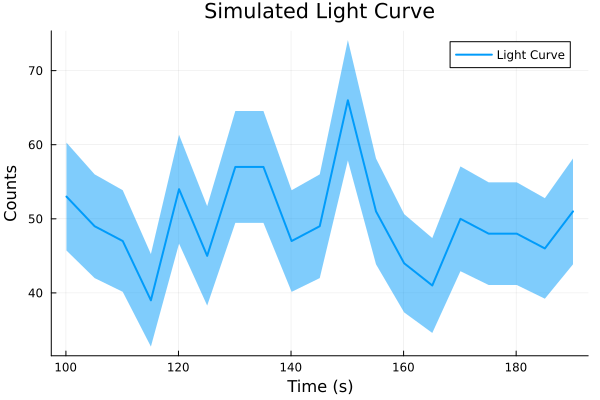

In [6]:
using Plots

plot(lightcurve.timebins, lightcurve.counts, ribbon=lightcurve.count_error, lw=2, label="Light Curve",
     xlabel="Time (s)", ylabel="Counts", title="Simulated Light Curve", legend=:topright)
